In [67]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from langdetect import detect

In [68]:
consumerKey = '################'
consumerSecret = '###########################'
accessToken = '######################'
accessTokenSecret = '################################'

In [69]:
#Create authenticate object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authenticate.set_access_token(accessToken, accessTokenSecret)

#create API object
api = tweepy.API(authenticate)

In [70]:
query = 'covishield'
max_tweets = 1000
results_covishield = api.search_tweets(q=query, count=max_tweets)
query = 'covaxin'
results_covaxin = api.search_tweets(q=query, count=max_tweets)
query = 'sputnik'
results_sputnik = api.search_tweets(q=query, count=max_tweets)

In [71]:
json_data = [r._json for r in results_covishield]
df_covishield = pd.json_normalize(json_data)

json_data = [r._json for r in results_covaxin]
df_covaxin = pd.json_normalize(json_data)

json_data = [r._json for r in results_sputnik]
df_sputnik = pd.json_normalize(json_data)

In [72]:
df_covishield.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
0,Sat Oct 02 11:35:37 +0000 2021,1444264807801122818,1444264807801122818,RT @OpIndia_in: ‘मैंने भारत में बनी कोविशील्ड ...,False,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Oct 02 11:35:34 +0000 2021,1444264791279767559,1444264791279767559,RT @sidhant: I got Covishield from India. A la...,False,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat Oct 02 11:34:56 +0000 2021,1444264632214904836,1444264632214904836,RT @timesofindia: 'I got Covishield from India...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sat Oct 02 11:34:52 +0000 2021,1444264617090293766,1444264617090293766,RT @OpIndia_in: ‘मैंने भारत में बनी कोविशील्ड ...,False,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Oct 02 11:34:52 +0000 2021,1444264615005732873,1444264615005732873,RT @OpIndia_in: ‘मैंने भारत में बनी कोविशील्ड ...,False,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_covaxin.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.lang,retweeted_status.possibly_sensitive,retweeted_status.user.entities.url.urls,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.possibly_sensitive
0,Sat Oct 02 11:35:32 +0000 2021,1444264785759989767,1444264785759989767,RT @RiseofBurnol: Prediction \n\nAfter long de...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Oct 02 11:34:31 +0000 2021,1444264530205462538,1444264530205462538,@Silva63222304 @Tea36658062 @jose_simao Parabé...,True,"<a href=""http://twitter.com/download/iphone"" r...",1.444253e+18,1444253258839728129,1.173101e+18,1173100694183788544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat Oct 02 11:32:59 +0000 2021,1444264141703860228,1444264141703860228,@WHOAFRO By delaying Covaxin #Covaxin you just...,True,"<a href=""http://twitter.com/download/android"" ...",1.443901e+18,1443901036058583044,5.443896e+08,544389588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sat Oct 02 11:31:39 +0000 2021,1444263807316987907,1444263807316987907,@suhasinih @janusmyth India was the pillar of ...,True,"<a href=""http://twitter.com/download/iphone"" r...",1.444263e+18,1444263014497075201,2.596618e+07,25966181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Oct 02 11:30:25 +0000 2021,1444263495982145536,1444263495982145536,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,True,"<a href=""https://help.twitter.com/en/using-twi...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_sputnik.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
0,Sat Oct 02 11:35:45 +0000 2021,1444264838700613637,1444264838700613637,can they perform frost and dear sputnik please 🤓,False,"<a href=""http://twitter.com/download/android"" ...",1.444265e+18,1444264837379407874,1.031133e+18,1031132507067101186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Oct 02 11:35:33 +0000 2021,1444264789614628870,1444264789614628870,RT @tankie_gf: The Cuban vaccine is just as ef...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat Oct 02 11:35:31 +0000 2021,1444264780999626752,1444264780999626752,@elpais_america Seria bueno que la Comision in...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.444256e+18,1444255898961072129,1.244358e+09,1244357988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sat Oct 02 11:35:24 +0000 2021,1444264751421431813,1444264751421431813,RT @LuisGasulla: Sputnik V: 84 dosis de los lo...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Oct 02 11:35:19 +0000 2021,1444264732194652166,1444264732194652166,@sputnik_fr qu'il pense au mien également ... ...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.444262e+18,1444261631177990145,2.380807e+08,238080747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#Extracting only the tweet column from the dfs

df_covishield = df_covishield['text']
df_covishield = df_covishield.to_frame().reset_index()
del df_covishield['index']

df_covaxin = df_covaxin['text']
df_covaxin = df_covaxin.to_frame().reset_index()
del df_covaxin['index']

df_sputnik = df_sputnik['text']
df_sputnik = df_sputnik.to_frame().reset_index()
del df_sputnik['index']

In [76]:
#Cleaning the tweets

def cleanTweets(text):
    
    if text == '' or text=='...' or text== None:
        return 'None'
    try:
        lang = detect(text)
        if lang !='en':
            return 'None'
    except Exception as e:
        print(e)
        print(text)
        return 'None'
    
    # Convert to lowercase
    text = text.lower()
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove retweets:
    text = re.sub(r'RT : ', '', text)
    # Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    # Removing extra spaces from start and end
    text = re.sub(r"^\s+", "", text)
    
    return text
  
df_covishield['text'] = df_covishield['text'].apply(cleanTweets)
df_covaxin['text'] = df_covaxin['text'].apply(cleanTweets)
df_sputnik['text'] = df_sputnik['text'].apply(cleanTweets)

In [77]:
df_covaxin = df_covaxin[df_covaxin.text != 'None']
df_covishield = df_covishield[df_covishield.text != 'None']
df_sputnik = df_sputnik[df_sputnik.text != 'None']
df_covaxin.dropna()
df_covishield.dropna()
df_sputnik.dropna()

,text
0,can they perform frost and dear sputnik please 🤓
1,rt : the cuban vaccine is just as effective as...
5,rt : argentina’s ceo on sputnikv authorizati...
14,rt : argentina’s ceo on sputnikv authorizati...
18,✨dear sputnik live cutie✨
21,seven million doses of covid19 vaccines have a...
28,western balkans: russia's sputnik skews public...
34,if dear sputnik's going to be txt's opening so...
36,rt : argentina’s ceo on sputnikv authorizati...
44,rt : argentina’s ceo on sputnikv authorizati...


In [78]:

#Create a function for subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creating seperate columns for subjectivity and polarity

df_covishield['Subjectivity'] = df_covishield['text'].apply(getSubjectivity)
df_covishield['Polarity'] = df_covishield['text'].apply(getPolarity)

df_covaxin['Subjectivity'] = df_covaxin['text'].apply(getSubjectivity)
df_covaxin['Polarity'] = df_covaxin['text'].apply(getPolarity)

df_sputnik['Subjectivity'] = df_sputnik['text'].apply(getSubjectivity)
df_sputnik['Polarity'] = df_sputnik['text'].apply(getPolarity)

In [79]:
#builds a function to calculate and categorize each tweet as Negative, Neutral, and Positive
def getTextAnalysis(text):
    if text < 0:
        return "Negative"
    elif text == 0:
        return "Neutral"
    else:
        return "Positive"
    
    
#creates another column called Score and applies the function to the dataframe
df_covishield['Score'] = df_covishield['Polarity'].apply(getTextAnalysis)
df_covaxin['Score'] = df_covaxin['Polarity'].apply(getTextAnalysis)
df_sputnik['Score'] = df_sputnik['Polarity'].apply(getTextAnalysis)


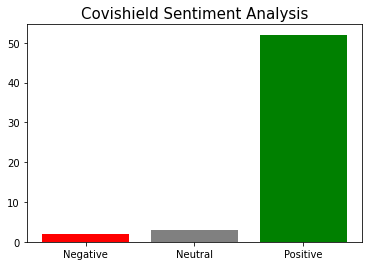

In [80]:
#visualizes the data through a bar chart

x_axis = df_covishield.groupby('Score').count().index.values
y_axis = df_covishield.groupby('Score').size().values
plt.bar(x_axis, y_axis, color = ['red', 'grey', 'green'])
plt.title(label = "Covishield Sentiment Analysis", fontsize = '15')
plt.show()

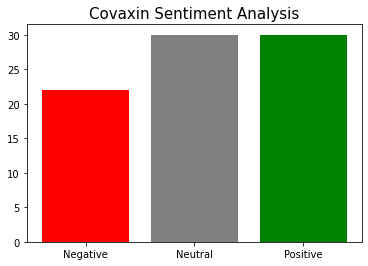

In [81]:
#visualizes the data through a bar chart

x_axis = df_covaxin.groupby('Score').count().index.values
y_axis = df_covaxin.groupby('Score').size().values
plt.bar(x_axis, y_axis, color = ['red', 'grey', 'green'])
plt.title(label = "Covaxin Sentiment Analysis", fontsize = '15')
plt.show()

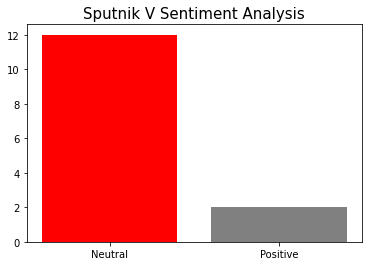

In [82]:
#visualizes the data through a bar chart

x_axis = df_sputnik.groupby('Score').count().index.values
y_axis = df_sputnik.groupby('Score').size().values
plt.bar(x_axis, y_axis, color = ['red', 'grey', 'green'])
plt.title(label = "Sputnik V Sentiment Analysis", fontsize = '15')
plt.show()

In [83]:

df_whole = df_covaxin.append(df_covishield)
df_whole = df_whole.append(df_sputnik)
df_whole.shape

(153, 4)

In [84]:
df_whole_negative = df_whole[df_whole['Score'] == 'Negative']

(-0.5, 999.5, 599.5, -0.5)

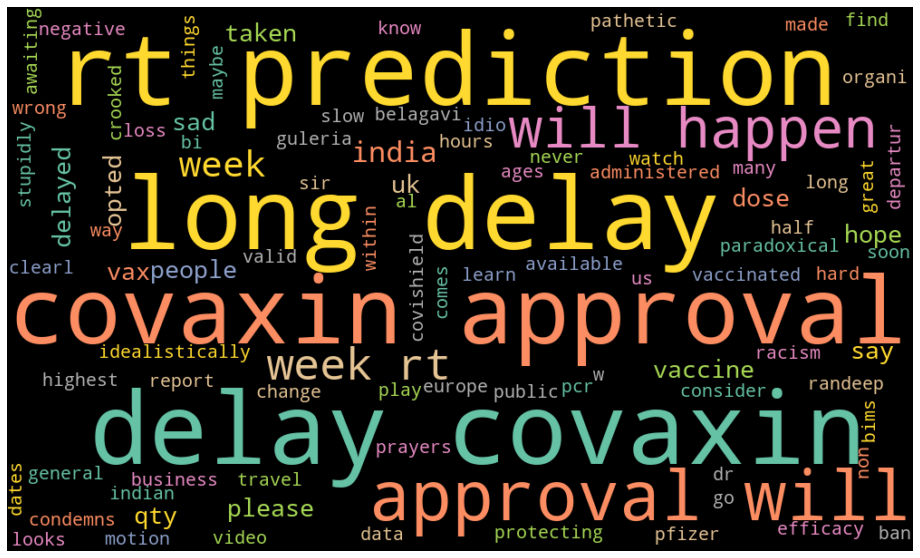

In [85]:
allWords = ' '.join([tweet for tweet in df_whole_negative['text']])
wordCloud = WordCloud(width=1000, height=600, random_state=42, background_color='black', 
                      colormap='Set2', max_font_size=110, stopwords=STOPWORDS).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

In [86]:
df_whole_positive = df_whole[df_whole['Score'] == 'Positive']

(-0.5, 999.5, 599.5, -0.5)

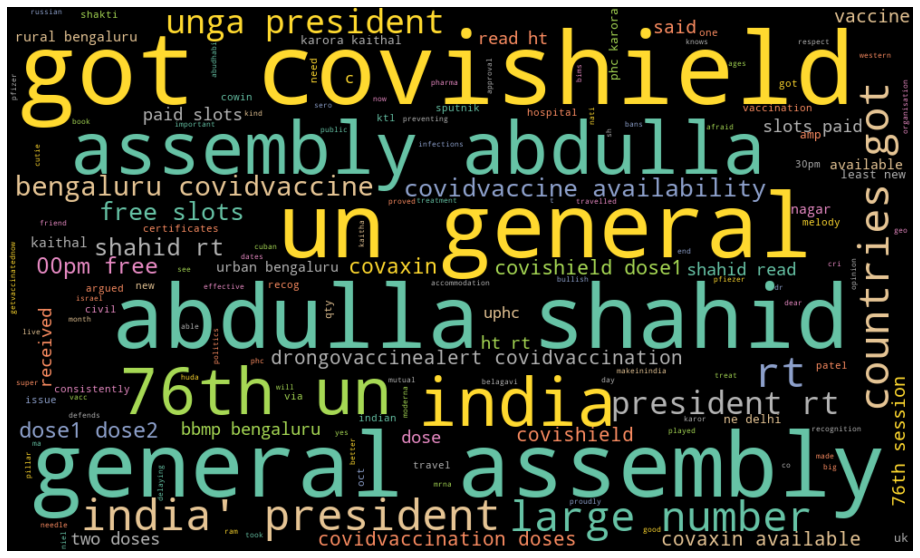

In [87]:
allWords = ' '.join([tweet for tweet in df_whole_positive['text']])
wordCloud = WordCloud(width=1000, height=600, random_state=42, background_color='black', 
                      colormap='Set2', max_font_size=110, stopwords=STOPWORDS).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')